In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [235]:
N = 1000                                      # number of nodes
q_voter_model = nx.gnm_random_graph(N, 7*N)   # to get average degree = 14

In [236]:
def average_degree(a):
    temp = [x[1] for x in a.degree()]
    return (sum(temp)/len(temp))

In [237]:
print(average_degree(q_voter_model))
print(len(q_voter_model.nodes()))                 #just check if everything is working

1000

In [238]:
def add_independence_and_opinion(graph, p1 ,p2):
    """p1 is p if independence p2 is concentration of opinion 1 """
    print("---------------------------------------------------")
    print("Setting independence with p = {}".format(p1))
    p_of_independency = p1
    for i in tqdm_notebook(range(len(graph.nodes()))):
        if(random.random()<p_of_independency):
            graph.nodes[i]["independent"] = 1
        else:
            graph.nodes[i]["independent"] = 0
    print("Independence is set \n")
    print("---------------------------------------------------")
    print("Setting opinion = 1 with p = {}".format(p2))
    p_of_concentration = p2
    for i in tqdm_notebook(range(len(graph.nodes()))):
        if(random.random()<p_of_concentration):
            graph.nodes[i]["opinion"] = 1
        else:
            graph.nodes[i]["opinion"] = -1
    print("Opinion is set")
    print("---------------------------------------------------")
    return(graph)

In [239]:
def mcs(graph, p_of_change_opinio):
    p_of_change_opinion = p_of_change_opinio
    for i in range(len(graph.nodes())):
        if(graph.nodes[i]["independent"] == 1):
            pass
        else:
            temp = [q_voter_model.nodes[x]['opinion'] for x in graph.neighbors(i)]
            if(len(temp)>7):
                if(p_of_change_opinion > random.random()):
                    # do mcs
                    if(sum(random.sample(temp,3))==3):
                        graph.nodes[i]["opinion"] = 1
                    elif(sum(random.sample(temp,3))==-3):
                        graph.nodes[i]["opinion"] = -1
                    else:
                        pass
            else:
                pass
            
    return(graph)

In [240]:
def average_opinion(graph):
    counter = 0
    for i in range(len(graph.nodes())):
        counter += graph.nodes[i]["opinion"]
    return(counter/len(graph.nodes()))

In [241]:
q_voter_model = add_independence_and_opinion(q_voter_model, 0.2, 0.9)
print("Average opinion pre MCS is equal to: {}".format(average_opinion(q_voter_model)))
print("Starting MCSteps")
av_opinion_values = []
for i in tqdm_notebook(range(1000)):
    q_voter_model = mcs(q_voter_model,1)
    if(i%100 == 0):
        av_opinion_values.append(average_opinion(q_voter_model))
print("MonteCarlo ended")
print("--------------------------------")
print("Average opinion after MCS is equal to: {}".format(average_opinion(q_voter_model)))

---------------------------------------------------
Setting independence with p = 0.2


Independence is set 

---------------------------------------------------
Setting opinion = 1 with p = 0.9


Opinion is set
---------------------------------------------------
Average opinion pre MCS is equal to: 0.792
Starting MCSteps


MonteCarlo ended
--------------------------------
Average opinion after MCS is equal to: 0.938


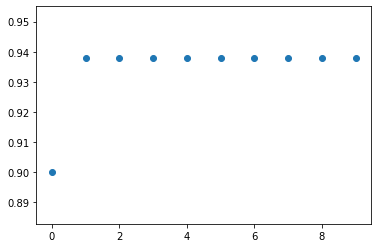

[0.9, 0.938, 0.938, 0.938, 0.938, 0.938, 0.938, 0.938, 0.938, 0.938]


In [242]:
plt.scatter(range(len(av_opinion_values)),av_opinion_values)
plt.show()
print(av_opinion_values)

In [2]:
import numpy as np
plt.style.use('ggplot')

In [15]:
def giant_when_attacking_closeness(graph):
    """Returns the sizes of biggest subgraphs for each fraction of removed nodes
    Fractions start at 0.5 and go to ca. 0.97 (it's amount of nodes divided by elements from fractions array)"""
    giants = list()
    # Couldn't thnik of smarter solution
    fractions = np.array([2.0, 1.75, 1.5, 1.3, 1.2, 1.1, 1.05, 1.03])

    for f in fractions:
        xx = [x[0] for x in sorted(nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True)]
        x = xx[0:int(len(graph.nodes())/f)]
        # Only now I realise how ineffective this is. But \"if it works, don't touch it\" :P
        gc = graph.copy()
        gc.remove_nodes_from(x)
        giants.append(len(max(nx.connected_components(gc), key = len)))
    return giants

def giant_when_attacking_betwenness(graph):
    """Returns the sizes of biggest subgraphs for each fraction of removed nodes
    Fractions start at 0.5 and go to ca. 0.97 (it's amount of nodes divided by elements from fractions array)"""
    giants = list()
    # Couldn't thnik of smarter solution
    fractions = np.array([2.0, 1.75, 1.5, 1.3, 1.2, 1.1, 1.05, 1.03])

    for f in fractions:
        xx = [x[0] for x in sorted(nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True)]
        x = xx[0:int(len(graph.nodes())/f)]
        # Only now I realise how ineffective this is. But \"if it works, don't touch it\" :P
        gc = graph.copy()
        gc.remove_nodes_from(x)
        giants.append(len(max(nx.connected_components(gc), key = len)))
    return giants

def giant_without_attacking(graph):
    return len(graph.nodes())

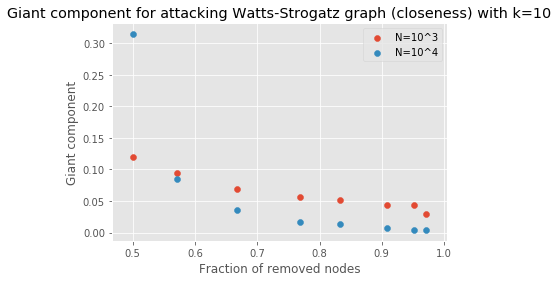

AttributeError: module 'networkx' has no attribute 'betwenness_centrality'

In [5]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
wsg3 = nx.watts_strogatz_graph(n=1000, k=10, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=10, p=0.01)
#wsg5 = nx.watts_strogatz_graph(n=100000, k=10, p=0.01)

gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking_closeness(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking_closeness(wsg4)])
#gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking_closeness(wsg5)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
#plt.scatter(fractions, gs[2])
plt.title("Giant component for attacking Watts-Strogatz graph (closeness) with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4"])
plt.savefig("Giant component for attacking Watts-Strogatz graph (closeness) with k=10")
plt.show()




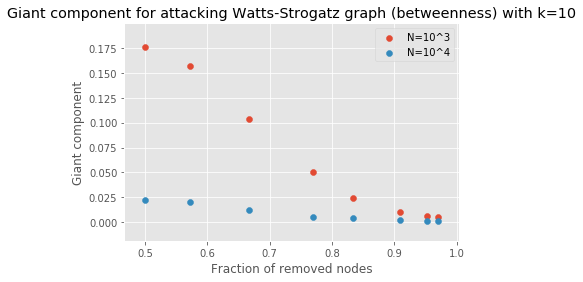

In [16]:
gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking_betwenness(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking_betwenness(wsg4)])
#gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking_betwenness(wsg5)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
#plt.scatter(fractions, gs[2])
plt.title("Giant component for attacking Watts-Strogatz graph (betweenness) with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4"])
plt.savefig("Giant component for attacking Watts-Strogatz graph (betweenness) with k=10")
plt.show()

In [ ]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
wsg3 = nx.watts_strogatz_graph(n=1000, k=20, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=20, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=20, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=20, p=0.01)

gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking_closeness(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking_closeness(wsg4)])
gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking_closeness(wsg5)])
gs.append([x/giant_without_attacking(wsg6) for x in giant_when_attacking_closeness(wsg6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Watts-Strogatz graph (closeness) with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Watts-Strogatz graph (closeness) with k=20")
plt.show()


gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking_betwenness(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking_betwenness(wsg4)])
gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking_betwenness(wsg5)])
gs.append([x/giant_without_attacking(wsg6) for x in giant_when_attacking_betwenness(wsg6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Watts-Strogatz graph (betweenness) with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Watts-Strogatz graph (betweenness) with k=20")
plt.show()

In [ ]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
wsg3 = nx.watts_strogatz_graph(n=1000, k=30, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=30, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=30, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=30, p=0.01)

gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking_closeness(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking_closeness(wsg4)])
gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking_closeness(wsg5)])
gs.append([x/giant_without_attacking(wsg6) for x in giant_when_attacking_closeness(wsg6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Watts-Strogatz graph (closeness) with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Watts-Strogatz graph (closeness) with k=30")
plt.show()


gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking_betwenness(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking_betwenness(wsg4)])
gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking_betwenness(wsg5)])
gs.append([x/giant_without_attacking(wsg6) for x in giant_when_attacking_betwenness(wsg6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Watts-Strogatz graph (betweenness) with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Watts-Strogatz graph (betweenness) with k=30")
plt.show()

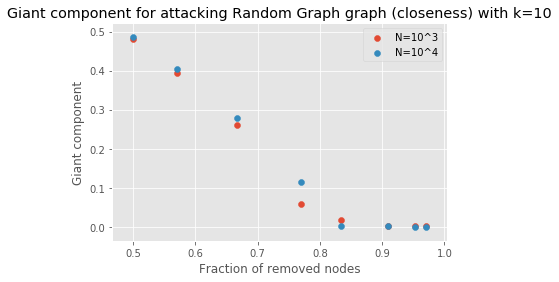

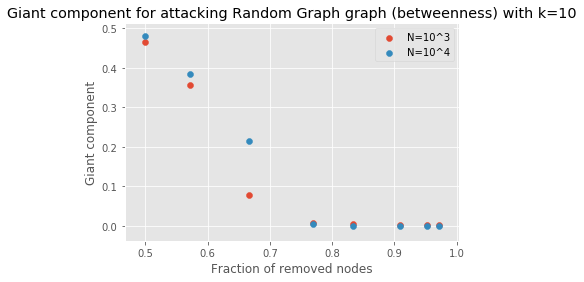

In [17]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
er3 = nx.fast_gnp_random_graph(n=1000, p=10/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=10/(10000-1))
#er5 = nx.fast_gnp_random_graph(n=100000, p=10/(100000-1))
#er6 = nx.fast_gnp_random_graph(n=1000000, p=10/(1000000-1))

gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking_closeness(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking_closeness(er4)])
#gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking_closeness(er5)])
#gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking_closeness(er6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
#plt.scatter(fractions, gs[2])
#plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Random Graph graph (closeness) with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4"])
plt.savefig("Giant component for attacking Random Graph graph (closeness) with k=10")
plt.show()


gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking_betwenness(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking_betwenness(er4)])
#gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking_betwenness(er5)])
#gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking_betwenness(er6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
#plt.scatter(fractions, gs[2])
#plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Random Graph graph (betweenness) with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4"])
plt.savefig("Giant component for attacking Random Graph graph (betweenness) with k=10")
plt.show()

In [ ]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
er3 = nx.fast_gnp_random_graph(n=1000, p=20/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=20/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=20/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=20/(1000000-1))

gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking_closeness(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking_closeness(er4)])
gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking_closeness(er5)])
gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking_closeness(er6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Random Graph graph (closeness) with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Random Graph graph (closeness) with k=20")
plt.show()


gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking_betwenness(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking_betwenness(er4)])
gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking_betwenness(er5)])
gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking_betwenness(er6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Random Graph graph (betweenness) with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Random Graph graph (betweenness) with k=20")
plt.show()

In [ ]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
er3 = nx.fast_gnp_random_graph(n=1000, p=30/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=30/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=30/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=30/(1000000-1))

gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking_closeness(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking_closeness(er4)])
gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking_closeness(er5)])
gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking_closeness(er6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Random Graph graph (closeness) with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Random Graph graph (closeness) with k=30")
plt.show()


gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking_betwenness(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking_betwenness(er4)])
gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking_betwenness(er5)])
gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking_betwenness(er6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Random Graph graph (betweenness) with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Random Graph graph (betweenness) with k=30")
plt.show()

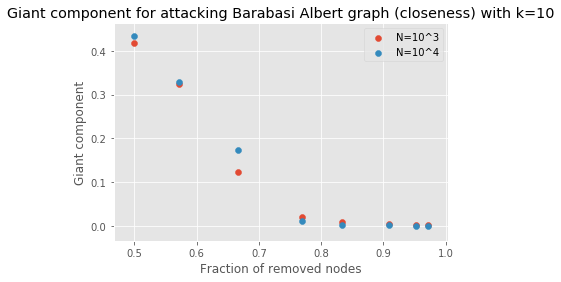

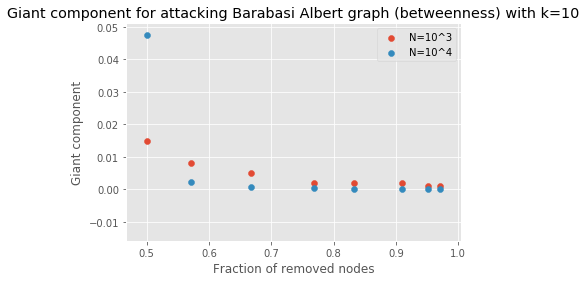

In [18]:
ba3 = nx.barabasi_albert_graph(n=1000,m=5)
ba4 = nx.barabasi_albert_graph(n=10000,m=5)
#ba5 = nx.barabasi_albert_graph(n=100000,m=5)
#ba6 = nx.barabasi_albert_graph(n=1000000,m=5)

gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking_closeness(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking_closeness(ba4)])
#gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking_closeness(ba5)])
#gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking_closeness(ba6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
#plt.scatter(fractions, gs[2])
#plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi Albert graph (closeness) with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4"])
plt.savefig("Giant component for attacking Barabasi Albert graph (closeness) with k=10")
plt.show()


gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking_betwenness(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking_betwenness(ba4)])
#gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking_betwenness(ba5)])
#gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking_betwenness(ba6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
#plt.scatter(fractions, gs[2])
#plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi Albert graph (betweenness) with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4"])
plt.savefig("Giant component for attacking Barabasi Albert graph (betweenness) with k=10")
plt.show()

In [ ]:
ba3 = nx.barabasi_albert_graph(n=1000,m=10)
ba4 = nx.barabasi_albert_graph(n=10000,m=10)
ba5 = nx.barabasi_albert_graph(n=100000,m=10)
ba6 = nx.barabasi_albert_graph(n=1000000,m=10)

gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking_closeness(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking_closeness(ba4)])
gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking_closeness(ba5)])
gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking_closeness(ba6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi Albert graph (closeness) with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Barabasi Albert graph (closeness) with k=20")
plt.show()


gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking_betwenness(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking_betwenness(ba4)])
gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking_betwenness(ba5)])
gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking_betwenness(ba6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi Albert graph (betweenness) with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Barabasi Albert graph (betweenness) with k=20")
plt.show()

In [ ]:
ba3 = nx.barabasi_albert_graph(n=1000,m=15)
ba4 = nx.barabasi_albert_graph(n=10000,m=15)
ba5 = nx.barabasi_albert_graph(n=100000,m=15)
ba6 = nx.barabasi_albert_graph(n=1000000,m=15)

gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking_closeness(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking_closeness(ba4)])
gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking_closeness(ba5)])
gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking_closeness(ba6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi Albert graph (closeness) with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Barabasi Albert graph (closeness) with k=30")
plt.show()


gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking_betwenness(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking_betwenness(ba4)])
gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking_betwenness(ba5)])
gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking_betwenness(ba6)])

fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03]
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi Albert graph (betweenness) with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Barabasi Albert graph (betweenness) with k=30")
plt.show()